In [1]:
!pwd

/content


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  2 19:56:23 2020

@author: Rakib H. Hridoy
github.com/rakibhhriody
linkedin.com/in/rakibhhridoy

"""


import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np




                      #########****** Lets Define Our Variables ******########


#--before Image Preprocessing make sure to make a model first
#-- Directory Linking
#-- Just Change These Variable as your need

base_directory_path = r'/content/drive/My Drive/Colab/model_load_train/covid_ctscan'
train_fn =  'train'
validation_fn = 'validation'
class1_fn = 'ct_covid'
class2_fn = 'ct_non'

#-- Name of the Images in Training Set -- for surity that we have successfully linked our images
amount = 10

#-- Defining Two Classes of Image
class1_name = 'covid'
class2_name = 'non-covid'

#-- To see training Images -- For Surity
number_of_image = 16

#-- Image Reshaping, Defining For Resize

rescale = 255
class_type = 'binary'
target_size = (150,150) 
batch_size = 10

#-- Image Augmentation
batch_size_aug = 10
width_shift_range = 0.2
height_shift_range = 0.2 
shear_range = 45
zoom_range = 0.5
rotation_range = 45






def joining_directory_to_each_other_binary_class(base_directory_path, train_fn, validation_fn, class1_fn, class2_fn):
    
  # -- In Both Train and Validation Directory the class1 and class2   --Folder name have to be same--

  base_dir = base_directory_path

  train_dir = os.path.join(base_dir, train_fn)
  validation_dir = os.path.join(base_dir, validation_fn)

  # Directory with our training class1/class2 pictures
  train_class1_dir = os.path.join(train_dir, class1_fn)
  train_class2_dir = os.path.join(train_dir, class2_fn)

  # Directory with our validation class1/class2 pictures
  validation_class1_dir = os.path.join(validation_dir, class1_fn)
  validation_class2_dir = os.path.join(validation_dir, class2_fn)

  return train_dir, validation_dir, train_class1_dir , train_class2_dir, validation_class1_dir, validation_class2_dir





train_dir,validation_dir, train_class1_dir, train_class2_dir,validation_class1_dir, validation_class2_dir = joining_directory_to_each_other_binary_class(base_directory_path, train_fn, validation_fn, class1_fn, class2_fn)




                    ##--- Image Filename Showing --##


def training_filename_show(train_class1_dir, train_class2_dir, amount):
    
  # -- amount is for how many image name do we want to see

  train_class1_fnames = os.listdir( train_class1_dir)
  train_class2_fnames = os.listdir( train_class2_dir)

  print(train_class1_fnames[:amount])
  print(train_class2_fnames[:amount])

  return train_class1_fnames, train_class2_fnames



train_class1_fnames, train_class2_fnames = training_filename_show(train_class1_dir, train_class2_dir, amount)







                   #-- printing the amount of train and validation image --#


def train_validation_size(train_class1_dir, train_class2_dir, validation_class1_dir, validation_class2_dir, class1_name, class2_name):
    
  print(f'total training {class1_name} images :', len(os.listdir(      train_class1_dir ) ))
  print(f'total training {class2_name} images :', len(os.listdir(      train_class2_dir ) ))

  print(f'total validation {class1_name} images :', len(os.listdir( validation_class1_dir ) ))
  print(f'total validation {class2_name} images :', len(os.listdir( validation_class2_dir ) ))



train_validation_size(train_class1_dir, train_class2_dir, validation_class1_dir, validation_class2_dir, class1_name, class2_name)







                    #-- plotting the image --#


def plotting_image(number_of_image, train_class1_fnames, train_class2_fnames, train_class1_dir, train_class2_dir):

    # Parameters for our graph; we'll output images in a (number_of_image / 2 * number_of_image / 2) configuration

    nrows = number_of_image / 2
    ncols = number_of_image / 2

    pic_index = 0 
    
    # Index for iterating over images
    # Set up matplotlib fig, and size it to fit 4x4 pics


    fig = plt.gcf()
    fig.set_size_inches(ncols* number_of_image / 2, nrows* number_of_image / 2)

    pic_index+= number_of_image

    next_class1_pix = [os.path.join(train_class1_dir, fname) 
                    for fname in train_class1_fnames[ pic_index- number_of_image : pic_index] 
                    ]

    next_class2_pix = [os.path.join(train_class2_dir, fname) 
                    for fname in train_class2_fnames[ pic_index- number_of_image :pic_index]
                    ]

    for i, img_path in enumerate(next_class1_pix+next_class2_pix):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)

        img = mpimg.imread(img_path)
        plt.imshow(img)

    plt.show()





plotting_image(number_of_image,train_class1_fnames, train_class2_fnames, train_class1_dir, train_class2_dir)





                    ####---- TensorFlow Part ----####



                  ##--- Importing Different Module ---## 

import keras
from keras.preprocessing.image import ImageDataGenerator
import random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint





                   ###----- Labeled Image Resize || Augmentation || Both  -----### 




def resize_labeled_images(train_dir, validation_dir, rescale, class_type, target_size, batch_size):
    
    

  # All images will be rescaled by 1./rescale (e.g. 255).
  train_datagen = ImageDataGenerator( rescale = 1.0/ rescale )
  test_datagen  = ImageDataGenerator( rescale = 1.0/ rescale)

  # --------------------
  # Flow training images in batches of 20 using train_datagen generator
  # --------------------
  train_generator = train_datagen.flow_from_directory(train_dir,
                                                      batch_size= batch_size,
                                                      class_mode=  class_type,
                                                      target_size= target_size)     
  # --------------------
  # Flow validation images in batches of 20 using test_datagen generator
  # --------------------
  validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size= batch_size,
                                                          class_mode  =  class_type,
                                                          target_size = target_size)
  
  return train_generator , validation_generator


train_generator , validation_generator = resize_labeled_images(train_dir, validation_dir, rescale, class_type, target_size, batch_size)







def resize_labeled_images_augmentation(train_dir, validation_dir, target_size, batch_size_aug, 
                                      class_type,rescale, rotation_range,width_shift_range,height_shift_range, 
                                      shear_range, zoom_range):
    
    
  train_datagen = ImageDataGenerator(train_dir,
                                    rescale=1/ rescale,
                                    rotation_range= rotation_range,
                                    width_shift_range= width_shift_range,
                                    height_shift_range= height_shift_range,
                                    shear_range= shear_range,
                                    zoom_range= zoom_range,
                                    horizontal_flip= True,
                                    fill_mode='nearest')



  validation_datagen = ImageDataGenerator(validation_dir,
                                    rescale=1./ rescale,
                                    rotation_range= rotation_range,
                                    width_shift_range= width_shift_range,
                                    height_shift_range= height_shift_range,
                                    shear_range= shear_range,
                                    zoom_range= zoom_range,
                                    horizontal_flip= True,
                                    fill_mode='nearest')

  train_generator_augmented = train_datagen.flow_from_directory(train_dir,
                                                      target_size= target_size,  
                                                      batch_size= batch_size,
                                                      class_mode= class_type)

  validation_generator_augmented = validation_datagen.flow_from_directory(validation_dir,  
                                                              target_size= target_size,
                                                              batch_size= batch_size,
                                                              class_mode= class_type)
  
  return train_generator_augmented , validation_generator_augmented
  
  

train_generator_augmented , validation_generator_augmented = resize_labeled_images_augmentation(train_dir, validation_dir, 
                                                                                                target_size, batch_size_aug, 
                                                                                                class_type,rescale,
                                                                                                rotation_range,width_shift_range,
                                                                                                height_shift_range, 
                                                                                                shear_range, zoom_range)
                                                                                                                        








Output hidden; open in https://colab.research.google.com to view.

In [11]:
from keras.models import Sequential as kS
import keras as k
from keras import layers as kl
from keras.layers import Dense as kld
from keras.layers import Conv2D as klconv
from keras.layers import MaxPool2D as klmp
from keras.layers import Dropout as kldropout
from keras.layers import LSTM as kllstm

In [30]:
model = kS([
    klconv(32, (3,3), input_shape = (150,150,3), activation = 'relu'),
    klmp(2,2),
    kldropout(0.2),
    klconv(64, (3,3), activation= 'relu'),
    klmp(2,2),
    kldropout(0.2),
    klconv(128, (3,3), activation= 'relu'),
    klmp(2,2),
    kldropout(0.2),
    klconv(256, (3,3), activation= 'relu'),
    klmp(2,2),
    kldropout(0.2),
    kl.GlobalAveragePooling2D(),
    kld(512, activation = 'relu'),
    kld(256, activation = 'relu'),
    kld(1, activation = 'sigmoid')
])

In [31]:
from keras.optimizers import RMSprop
model.compile(loss= 'binary_crossentropy', optimizer= RMSprop(lr= 0.001), metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)      

In [26]:
#-- saving the model with checkpoints
saving_filepath = 'model_v1.h5'
model = model
verbose = 1
fit_model_epochs = 200


#-- loading a saved model
saved_model_filepath = 'model_v1.h5'
loaded_verbose = 500

#-- again saving model
again_save_model_path = 'model_v2.h5'


#-- Images Through Conv Layers
#model =  model


#-- Testing Image
test_image_path = 'path'
#test_image_model =  model
formatYourOutput = 'This is a Image of'


In [10]:
!ls -all

total 20
drwxr-xr-x 1 root root 4096 Jul  3 08:01 .
drwxr-xr-x 1 root root 4096 Jul  3 08:00 ..
drwxr-xr-x 1 root root 4096 Jun 26 16:26 .config
drwx------ 4 root root 4096 Jul  3 08:01 drive
drwxr-xr-x 1 root root 4096 Jun 26 16:26 sample_data


Epoch 1/200
70/70 [==============================] - 560s 8s/step - loss: 0.7290 - accuracy: 0.5359 - val_loss: 0.7246 - val_accuracy: 0.5000

Epoch 00001: loss improved from inf to 0.72923, saving model to model_v1.h5
Epoch 2/200
70/70 [==============================] - 4s 60ms/step - loss: 0.6837 - accuracy: 0.5417 - val_loss: 0.6969 - val_accuracy: 0.5000

Epoch 00002: loss improved from 0.72923 to 0.68379, saving model to model_v1.h5
Epoch 3/200
70/70 [==============================] - 4s 63ms/step - loss: 0.6766 - accuracy: 0.5244 - val_loss: 0.7106 - val_accuracy: 0.5000

Epoch 00003: loss improved from 0.68379 to 0.67659, saving model to model_v1.h5
Epoch 4/200
70/70 [==============================] - 4s 62ms/step - loss: 0.6901 - accuracy: 0.5618 - val_loss: 0.6916 - val_accuracy: 0.5600

Epoch 00004: loss did not improve from 0.67659
Epoch 5/200
70/70 [==============================] - 4s 61ms/step - loss: 0.6703 - accuracy: 0.5876 - val_loss: 0.7596 - val_accuracy: 0.6000

Ep

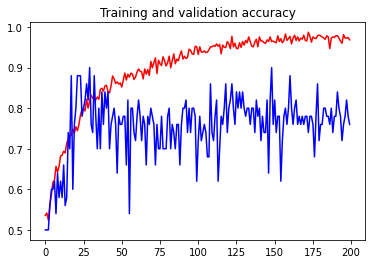

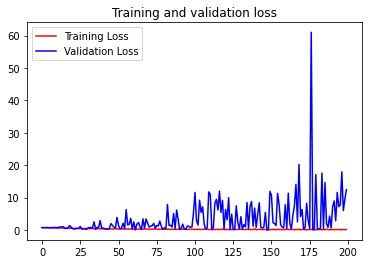

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in true_divide


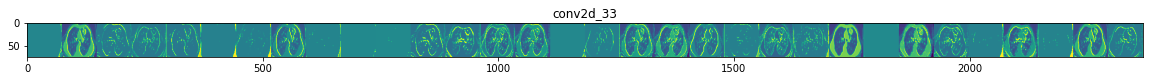

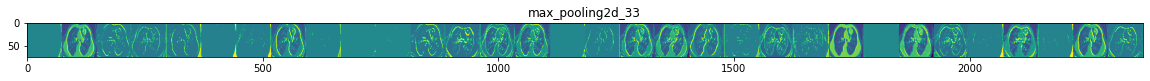

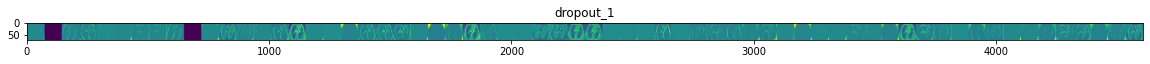

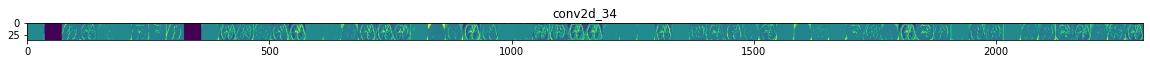

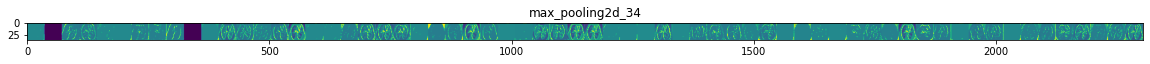

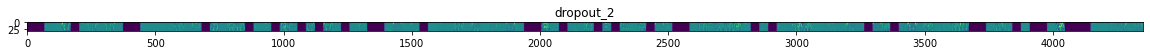

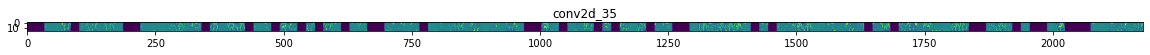

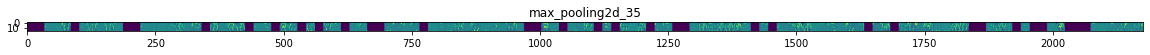

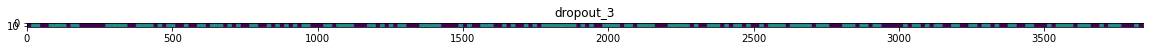

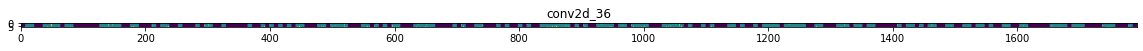

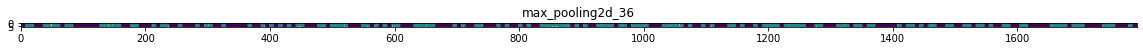

In [28]:

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator
import random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint





                       ###---- Training and Saving The Model at the same time ----###

        
# Checkpoints are the each epoch model data
    
def saving_model_with_checkpoint(saving_filepath, verbose):

  checkpoint = ModelCheckpoint(saving_filepath, monitor='loss', verbose= verbose, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]

  return callbacks_list

callbacks_list = saving_model_with_checkpoint(saving_filepath, verbose)





# fit the model
def model_fit_save(model,train_generator, validation_generator, fit_model_epochs, callbacks_list):

  history = model.fit_generator(train_generator,validation_data= validation_generator, epochs= fit_model_epochs, callbacks=callbacks_list)
  return history

history = model_fit_save(model,train_generator, validation_generator, fit_model_epochs, callbacks_list)




                            ###---- Load The Saved Model & Fit The Model Again ----###



def saved_model_load(saved_model_filepath):
  #--load the model
  
  loaded_saved_model = keras.models.load_model(saved_model_filepath)
  return loaded_saved_model

#loaded_saved_model = saved_model_load(saved_model_filepath)



def fit_loaded_saved_model(train_generator,loaded_saved_model, again_save_model_path, loaded_verbose,epochs):
  # fit the model
  checkpoint = ModelCheckpoint(again_save_model_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]
  history = loaded_saved_model.fit(train_generator, verbose = loaded_verbose, epochs= epochs, callbacks=callbacks_list)
  
  return history


#history = saved_model_load(train_generator, loaded_saved_model, again_save_model_path, loaded_verbose, epochs)

    
    
    
    
                            ###---- Model Performance Evaluating ----###
            
            

def evaluate_the_model_performance(history):
    
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


    
    
evaluate_the_model_performance(history)
    

    
    

                            ###---- Image Flow In Conolutional Layers ----###
    
    
    
def images_in_conv_layer(rescale, train_class1_dir, train_class2_dir, train_class1_fnames, train_class2_fnames, model, target_size):
    

  # Let's define a new Model that will take an image as input, and will output
  # intermediate representations for all layers in the previous model after
  # the first.
  successive_outputs = [layer.output for layer in model.layers[1:]]

  #visualization_model = Model(img_input, successive_outputs)
  visualization_model = keras.models.Model(inputs = model.input, outputs = successive_outputs)

  # Let's prepare a random input image of a cat or dog from the training set.
  class1_img_files = [os.path.join(train_class1_dir, f) for f in train_class1_fnames]
  class2_img_files = [os.path.join(train_class2_dir, f) for f in train_class2_fnames]

  img_path = random.choice(class1_img_files + class2_img_files)
  img = load_img(img_path, target_size= target_size)  # this is a PIL image

  x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
  x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

  # Rescale by 1/255
  x /= rescale

  # Let's run our image through our network, thus obtaining all
  # intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(x)

  # These are the names of the layers, so can have them as part of our plot
  layer_names = [layer.name for layer in model.layers]

  # -----------------------------------------------------------------------
  # Now let's display our representations
  # -----------------------------------------------------------------------
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
      
      if len(feature_map.shape) == 4:
      
      #-------------------------------------------
      # Just do this for the conv / maxpool layers, not the fully-connected layers
      #-------------------------------------------
          n_features = feature_map.shape[-1]  # number of features in the feature map
          size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
          
          # We will tile our images in this matrix
          display_grid = np.zeros((size, size * n_features))
          
          #-------------------------------------------------
          # Postprocess the feature to be visually palatable
          #-------------------------------------------------
          for i in range(n_features):
              x  = feature_map[0, :, :, i]
              x -= x.mean()
              x /= x.std ()
              x *=  64
              x += 128
              x  = np.clip(x, 0, 255).astype('uint8')
              display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

          #-----------------
          # Display the grid
          #-----------------

          scale = 20. / n_features
          plt.figure( figsize=(scale * n_features, scale) )
          plt.title ( layer_name )
          plt.grid  ( False )
          plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


images_in_conv_layer(rescale, train_class1_dir, train_class2_dir, train_class1_fnames, train_class2_fnames, model, target_size)
          
          
            
            
            


                       ###---- Manual ----###

                
def test_image(test_image_path,class1_name, class2_name, test_image_model, formatYourOutput,target_size):

  #predicting images

  img=image.load_img(test_image_path, target_size= target_size)

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = test_image_model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
      print(f"{formatYourOutput} {class1_name}")  

  else:
      print(f"{formatYourOutput} {class2_name}")


#test_image(test_image_path,class1_name, class2_name, test_image_model, formatYourOutput,target_size)








#-- Clean all the variables

def clean_up():
    import os, signal

    os.kill(   os.getpid() , 
          signal.SIGKILL
        )
  

#clean_up()



In [29]:
!ls -all

total 5160
drwxr-xr-x 1 root root    4096 Jul  3 08:39 .
drwxr-xr-x 1 root root    4096 Jul  3 08:00 ..
drwxr-xr-x 1 root root    4096 Jun 26 16:26 .config
drwx------ 4 root root    4096 Jul  3 08:01 drive
-rw-r--r-- 1 root root 5260920 Jul  3 08:52 model_v1.h5
drwxr-xr-x 1 root root    4096 Jun 26 16:26 sample_data


In [32]:
#-- saving the model with checkpoints
saving_filepath = 'model_augmented_v1.h5'
model = model
verbose = 1
fit_model_epochs = 500


#-- loading a saved model
saved_model_filepath = 'model_augmented_v1.h5'
loaded_verbose = 300

#-- again saving model
again_save_model_path = 'model_v2.h5'


#-- Images Through Conv Layers
model =  model


Epoch 1/500


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


70/70 [==============================] - 8s 109ms/step - loss: 0.7023 - accuracy: 0.5287 - val_loss: 0.6760 - val_accuracy: 0.5600

Epoch 00001: loss improved from inf to 0.70238, saving model to model_augmented_v1.h5
Epoch 2/500
70/70 [==============================] - 7s 105ms/step - loss: 0.6828 - accuracy: 0.5560 - val_loss: 0.7078 - val_accuracy: 0.5000

Epoch 00002: loss improved from 0.70238 to 0.68350, saving model to model_augmented_v1.h5
Epoch 3/500
70/70 [==============================] - 7s 105ms/step - loss: 0.6685 - accuracy: 0.5575 - val_loss: 0.6906 - val_accuracy: 0.5000

Epoch 00003: loss improved from 0.68350 to 0.66719, saving model to model_augmented_v1.h5
Epoch 4/500
70/70 [==============================] - 7s 104ms/step - loss: 0.6684 - accuracy: 0.5575 - val_loss: 1.5078 - val_accuracy: 0.5000

Epoch 00004: loss did not improve from 0.66719
Epoch 5/500
70/70 [==============================] - 7s 107ms/step - loss: 0.6734 - accuracy: 0.5790 - val_loss: 0.7265 - v

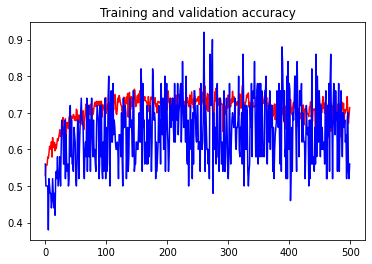

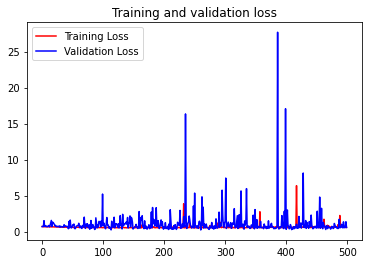

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:150: RuntimeWarning: invalid value encountered in true_divide


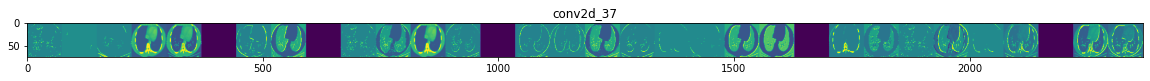

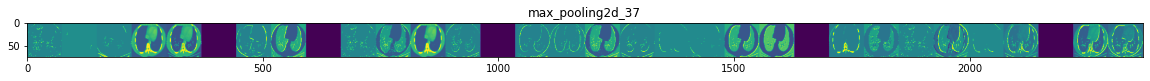

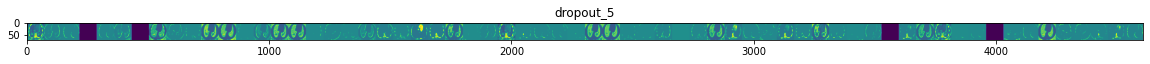

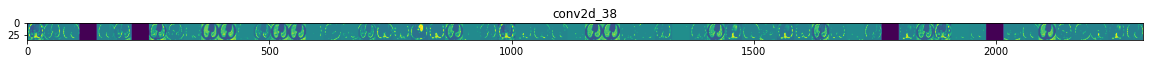

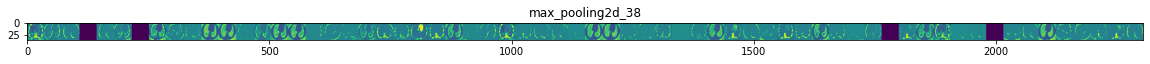

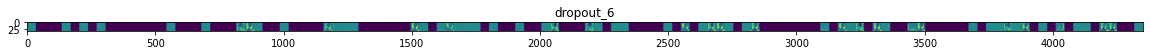

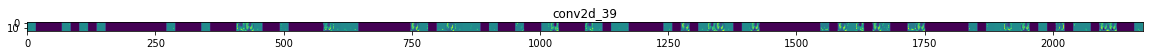

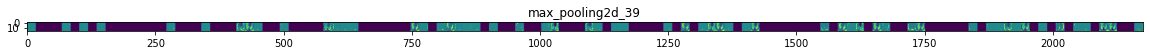

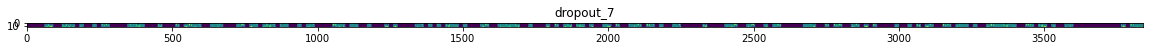

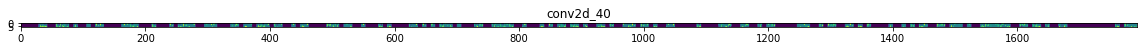

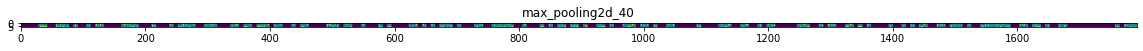

In [33]:

        
# Checkpoints are the each epoch model data
    
def saving_model_with_checkpoint(saving_filepath, verbose):

  checkpoint = ModelCheckpoint(saving_filepath, monitor='loss', verbose= verbose, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]

  return callbacks_list

callbacks_list = saving_model_with_checkpoint(saving_filepath, verbose)





# fit the model
def model_fit_save(model,train_generator, validation_generator, fit_model_epochs, callbacks_list):

  history = model.fit_generator(train_generator,validation_data= validation_generator, epochs= fit_model_epochs, callbacks=callbacks_list)
  return history

history = model_fit_save(model,train_generator_augmented, validation_generator_augmented, fit_model_epochs, callbacks_list)




                            ###---- Load The Saved Model & Fit The Model Again ----###



def saved_model_load(saved_model_filepath):
  #--load the model
  
  loaded_saved_model = keras.models.load_model(saved_model_filepath)
  return loaded_saved_model

#loaded_saved_model = saved_model_load(saved_model_filepath)



def fit_loaded_saved_model(train_generator,loaded_saved_model, again_save_model_path, loaded_verbose,epochs):
  # fit the model
  checkpoint = ModelCheckpoint(again_save_model_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]
  history = loaded_saved_model.fit(train_generator, verbose = loaded_verbose, epochs= epochs, callbacks=callbacks_list)
  
  return history


#history = saved_model_load(train_generator, loaded_saved_model, again_save_model_path, loaded_verbose, epochs)

    
    
    
    
                            ###---- Model Performance Evaluating ----###
            
            

def evaluate_the_model_performance(history):
    
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


    
    
evaluate_the_model_performance(history)
    

    
    

                            ###---- Image Flow In Conolutional Layers ----###
    
    
    
def images_in_conv_layer(rescale, train_class1_dir, train_class2_dir, train_class1_fnames, train_class2_fnames, model, target_size):
    

  # Let's define a new Model that will take an image as input, and will output
  # intermediate representations for all layers in the previous model after
  # the first.
  successive_outputs = [layer.output for layer in model.layers[1:]]

  #visualization_model = Model(img_input, successive_outputs)
  visualization_model = keras.models.Model(inputs = model.input, outputs = successive_outputs)

  # Let's prepare a random input image of a cat or dog from the training set.
  class1_img_files = [os.path.join(train_class1_dir, f) for f in train_class1_fnames]
  class2_img_files = [os.path.join(train_class2_dir, f) for f in train_class2_fnames]

  img_path = random.choice(class1_img_files + class2_img_files)
  img = load_img(img_path, target_size= target_size)  # this is a PIL image

  x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
  x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

  # Rescale by 1/255
  x /= rescale

  # Let's run our image through our network, thus obtaining all
  # intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(x)

  # These are the names of the layers, so can have them as part of our plot
  layer_names = [layer.name for layer in model.layers]

  # -----------------------------------------------------------------------
  # Now let's display our representations
  # -----------------------------------------------------------------------
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
      
      if len(feature_map.shape) == 4:
      
      #-------------------------------------------
      # Just do this for the conv / maxpool layers, not the fully-connected layers
      #-------------------------------------------
          n_features = feature_map.shape[-1]  # number of features in the feature map
          size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
          
          # We will tile our images in this matrix
          display_grid = np.zeros((size, size * n_features))
          
          #-------------------------------------------------
          # Postprocess the feature to be visually palatable
          #-------------------------------------------------
          for i in range(n_features):
              x  = feature_map[0, :, :, i]
              x -= x.mean()
              x /= x.std ()
              x *=  64
              x += 128
              x  = np.clip(x, 0, 255).astype('uint8')
              display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

          #-----------------
          # Display the grid
          #-----------------

          scale = 20. / n_features
          plt.figure( figsize=(scale * n_features, scale) )
          plt.title ( layer_name )
          plt.grid  ( False )
          plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


images_in_conv_layer(rescale, train_class1_dir, train_class2_dir, train_class1_fnames, train_class2_fnames, model, target_size)
          
          
            
            
            


                       ###---- Manual ----###

                
def test_image(test_image_path,class1_name, class2_name, test_image_model, formatYourOutput,target_size):

  #predicting images

  img=image.load_img(test_image_path, target_size= target_size)

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = test_image_model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
      print(f"{formatYourOutput} {class1_name}")  

  else:
      print(f"{formatYourOutput} {class2_name}")


#test_image(test_image_path,class1_name, class2_name, test_image_model, formatYourOutput,target_size)


In [34]:
## As our Dataset is small and the picture is quite same we cant make the progress..
## We may try object detection for better performance
## I'm working on that..